<a href="https://colab.research.google.com/github/MamadouBousso/IAProjects/blob/master/eda_global_terrorism_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('eda-global-terrorism-dataset')
jovian.set_colab_id('1BolM0NGp5H2rQin2iBMnh-n0R1vuvf1m')

     |████████████████████████████████| 68 kB 5.8 MB/s 


# eda-global-terrorism-dataset

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 4.1 MB/s 


In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="eda-global-terrorism-dataset")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


In [4]:
!pip install wordcloud --upgrade --quiet

     |████████████████████████████████| 366 kB 8.9 MB/s 


In [6]:
!pip install plotly --upgrade --quiet

     |████████████████████████████████| 25.3 MB 1.7 MB/s 


In [7]:
#Install the dataset using opendatasets library from Jovian/ML
!pip install opendatasets --upgrade --quiet

In [8]:
import wordcloud as wc
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import opendatasets as od
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import numpy as np
import math as m

# World Terrorism  exploration data analysis 
In this project we want to explore how terrorism expands around the world from 1972 to 2017. We use the Global Terrorism Database (GTD) which is the most comprehensive unclassified database of terrorist attacks in the world. The National Consortium for the Study of Terrorism and Responses to Terrorism (START) makes the GTD available via the https://start.umd.edu/gtd/and Kaggle  website. This is a contribution to the effort to improve understanding of terrorist violence, so that it can be more readily studied and defeated. We thank GTD  team of researchers and technical staff.

## GTD DATABASE

The GTD is an open-source database, which provides information on domestic and international terrorist attacks around the world since 1970, and now includes more than 200,000 events. For each event, a wide range of information is available, including the date and location of the incident, the weapons used, nature of the target, the number of casualties, and – when identifiable – the group or individual responsible.




## Download the data

In [9]:

download_url = 'https://www.kaggle.com/START-UMD/gtd'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mamadoubousso
Your Kaggle Key: ··········


100%|██████████| 28.7M/28.7M [00:00<00:00, 31.2MB/s]


In [10]:
data_file = './gtd/globalterrorismdb_0718dist.csv'

## Data preparation and cleaning

* We load the data file using pandas.
* We look for informations about  data and columns structure.
* We calculate  missing or incorrect values rate in the dataset


* We use pandas and put the dataset in a dataframe. This is a convenient structure for data exploration. The dataframe is called gterror_df

In [11]:
gterror_df = pd.read_csv(data_file,encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
gterror_df.head()

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001   1970       7     2  ...        0         0       0      NaN
1  197000000002   1970       0     0  ...        1         1       1      NaN
2  197001000001   1970       1     0  ...       -9         1       1      NaN
3  197001000002   1970       1     0  ...       -9         1       1      NaN
4  197001000003   1970       1     0  ...       -9         1       1      NaN

[5 rows x 135 columns]

* The dataframe has 135 columns with different types of data and 181691 rows. This is huge for our exploration so we will get rid of some of columns based on some criteria like:
    * the rate of missing data
    * The reccurrence of the information provided by the column
    * The utility of the information provided by the column

In [13]:
gterror_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [14]:
len(gterror_df.columns)

135

In [15]:
len(gterror_df)

181691

In [16]:
gterror_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Dtype  
---  ------              -----  
 0   eventid             int64  
 1   iyear               int64  
 2   imonth              int64  
 3   iday                int64  
 4   approxdate          object 
 5   extended            int64  
 6   resolution          object 
 7   country             int64  
 8   country_txt         object 
 9   region              int64  
 10  region_txt          object 
 11  provstate           object 
 12  city                object 
 13  latitude            float64
 14  longitude           float64
 15  specificity         float64
 16  vicinity            int64  
 17  location            object 
 18  summary             object 
 19  crit1               int64  
 20  crit2               int64  
 21  crit3               int64  
 22  doubtterr           float64
 23  alternative         float64
 24  alternative_txt     objec

In [17]:
# Description of numerical values
gterror_df.describe()

eventid          iyear  ...       INT_MISC        INT_ANY
count  1.816910e+05  181691.000000  ...  181691.000000  181691.000000
mean   2.002705e+11    2002.638997  ...       0.090010      -3.945952
std    1.325957e+09      13.259430  ...       0.568457       4.691325
min    1.970000e+11    1970.000000  ...      -9.000000      -9.000000
25%    1.991021e+11    1991.000000  ...       0.000000      -9.000000
50%    2.009022e+11    2009.000000  ...       0.000000       0.000000
75%    2.014081e+11    2014.000000  ...       0.000000       0.000000
max    2.017123e+11    2017.000000  ...       1.000000       1.000000

[8 rows x 77 columns]

### Exploratory analysis and visualization
* We start our exploration by reducing the number of colums based on the cleared  criteria above.

#### Percentage of missing values per columns
We calculate the percentage of missing values per columns. We plot columns based on percentage of missing values.

In [18]:
missing_percentages = gterror_df.isna().sum().sort_values(ascending = False)/len(gterror_df)
missing_percentages

gsubname3           0.999890
weapsubtype4_txt    0.999615
weapsubtype4        0.999615
weaptype4           0.999598
weaptype4_txt       0.999598
                      ...   
attacktype1         0.000000
suicide             0.000000
success             0.000000
crit3               0.000000
eventid             0.000000
Length: 135, dtype: float64

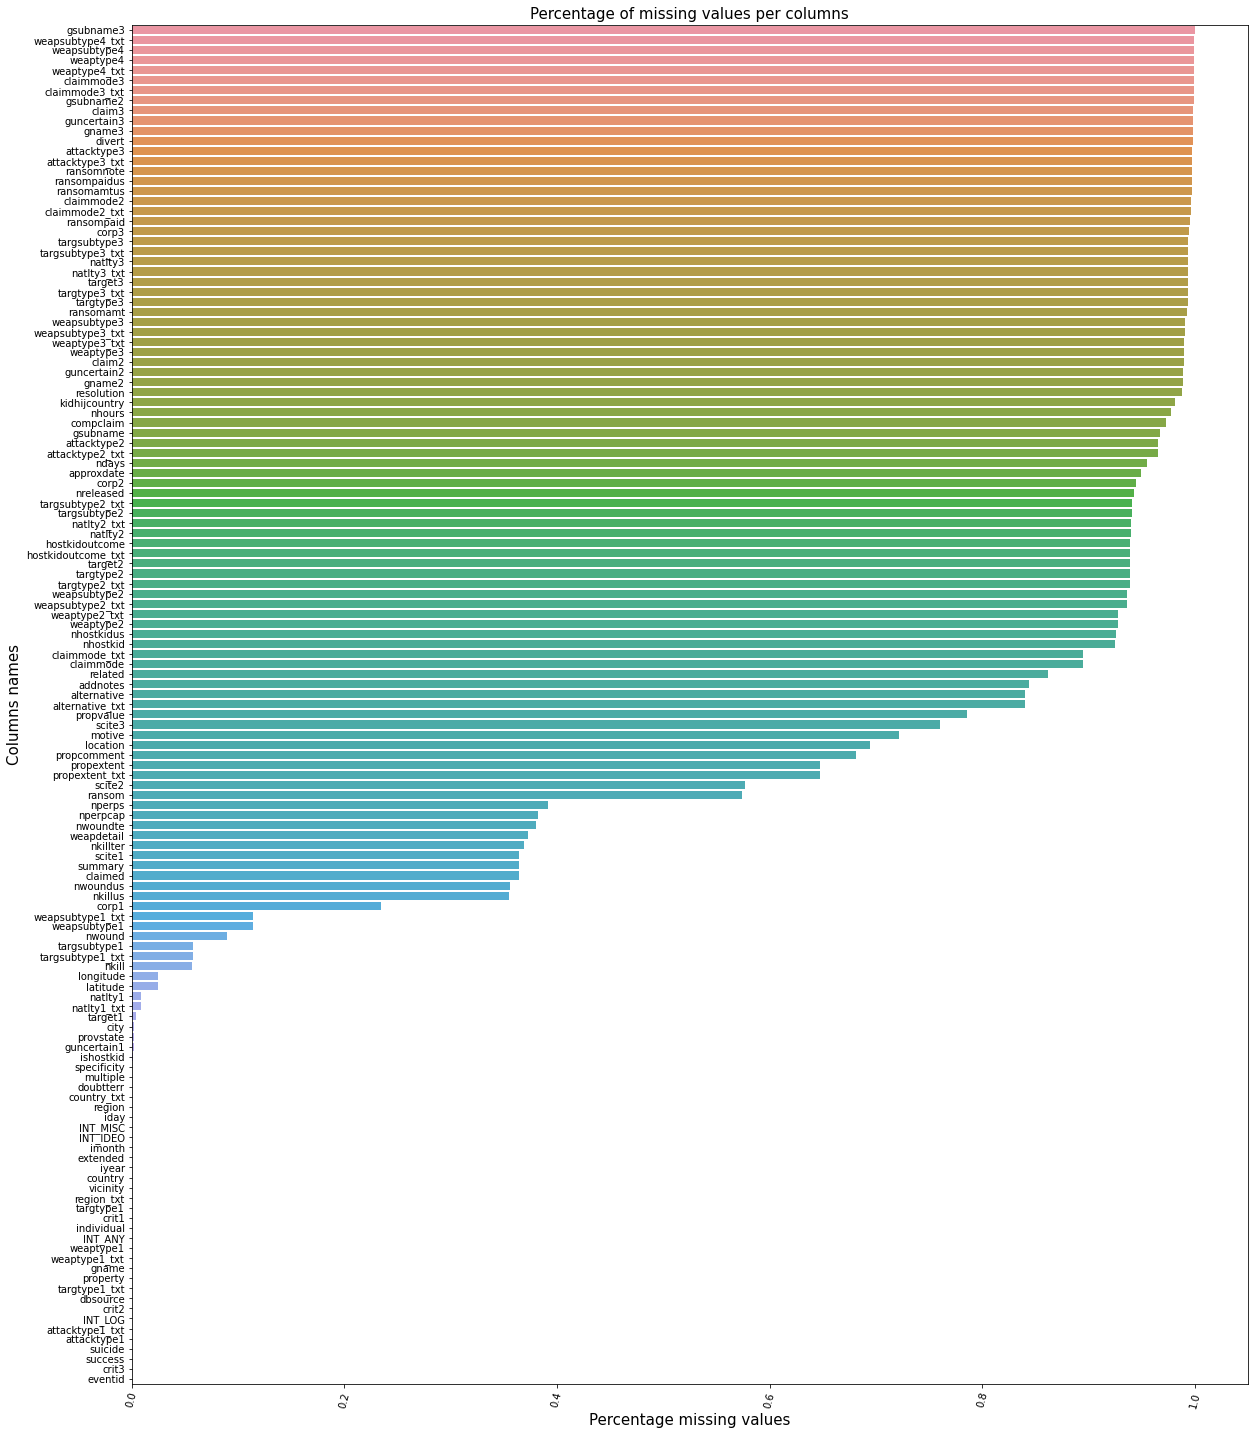

In [19]:

plt.figure(figsize=(20,25))
plt.xticks(rotation=75)
plt.yticks(fontsize=10)
plt.title("Percentage of missing values per columns",fontsize=15)
#plt.barh(missing_percentages.index,missing_percentages)
b = sns.barplot(x=missing_percentages, y=missing_percentages.index);
b.set_ylabel("Columns names",fontsize=15)
b.set_xlabel("Percentage missing values",fontsize=15)
#b.set_box_aspect(200/len(b.patches)) #change 10 to modify the y/x axis ratio
plt.show()



#### Remove columns that have more than 15% of missing data
We choose to remove columns with more than 15% of missing data. This will help clearing our data. The figure above gives us enough clues .  We  keep  47 columns from 135 after this cleaning operation.

In [20]:
# Get the list of columns having more than 15% of missing values
liste_empty_columns = list(missing_percentages[missing_percentages > 0.15].index.values)

In [21]:
gterror_df.drop(liste_empty_columns,inplace=True,axis=1)

In [22]:
gterror_df.head(5)

eventid  iyear  imonth  iday  ...  INT_LOG  INT_IDEO INT_MISC  INT_ANY
0  197000000001   1970       7     2  ...        0         0        0        0
1  197000000002   1970       0     0  ...        0         1        1        1
2  197001000001   1970       1     0  ...       -9        -9        1        1
3  197001000002   1970       1     0  ...       -9        -9        1        1
4  197001000003   1970       1     0  ...       -9        -9        1        1

[5 rows x 47 columns]

In [23]:
missing_percentages = gterror_df.isna().sum().sort_values(ascending = False)/len(gterror_df)
missing_percentages

weapsubtype1        0.114304
weapsubtype1_txt    0.114304
nwound              0.089773
targsubtype1        0.057091
targsubtype1_txt    0.057091
nkill               0.056761
longitude           0.025081
latitude            0.025076
natlty1_txt         0.008581
natlty1             0.008581
target1             0.003500
city                0.002389
provstate           0.002317
guncertain1         0.002091
ishostkid           0.000980
specificity         0.000033
multiple            0.000006
doubtterr           0.000006
vicinity            0.000000
INT_ANY             0.000000
region_txt          0.000000
crit2               0.000000
region              0.000000
country_txt         0.000000
country             0.000000
extended            0.000000
iday                0.000000
imonth              0.000000
iyear               0.000000
crit1               0.000000
attacktype1_txt     0.000000
crit3               0.000000
success             0.000000
suicide             0.000000
attacktype1   

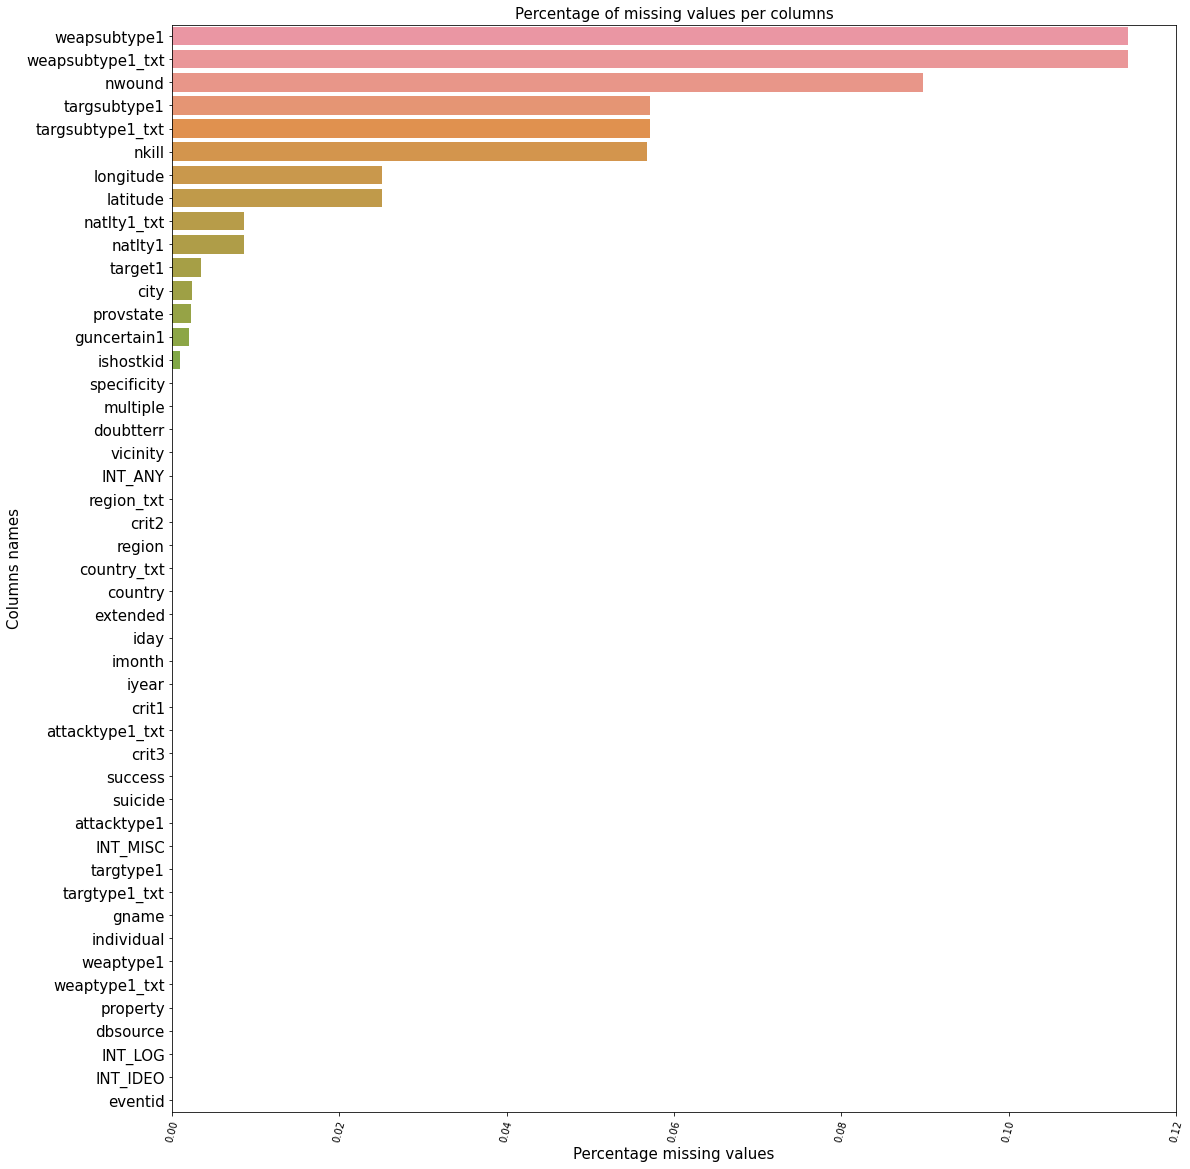

In [24]:
plt.figure(figsize=(18,20))
plt.xticks(rotation=75)
plt.yticks(fontsize=15)
plt.title("Percentage of missing values per columns",fontsize=15)
#plt.barh(missing_percentages.index,missing_percentages)
b = sns.barplot(x=missing_percentages, y=missing_percentages.index);
b.set_ylabel("Columns names",fontsize=15)
b.set_xlabel("Percentage missing values",fontsize=15)
#b.set_box_aspect(100/len(b.patches)) #change 10 to modify the y/x axis ratio
plt.show()

* We manually  drop some columns where the information is redundant. For example:
  * country and country_txt,
  * targsubtype1 and targsubtype1_txt,
  * region and region_txt,
  * weaptype1 and weaptype1_txt,
  * natity1 and natity1_txt
  * weapsubtype1 and weapsubtype1_txt,
  


In [25]:
listecolumns = ['country','targsubtype1','region','weaptype1','natlty1','weapsubtype1']

In [26]:
gterror_df.drop(listecolumns,inplace=True,axis=1)

#### Columns we will analyze
1. nkill: number of persons killed during terrorist attacks
2. nwound: number of persons wounded during terrorist attacks
3. attackstype_txt: type of attack
3. weapsubtype1_txt: Type of weapons used during attacks
4. targsubtype1_txt: Type of targets
5. suicide: number of suicide attacks
6. regions: regions names
7. country_txt: countries names

##### How does terrorism evolves from 1970 to 2017 ?
What are terrorist attacks trends from 1970 to 2017? We will try to answer the question  following three directions:
* evolution of the number of attacks over the world and over some regions
* evolution of the number of victims over the world and over some regions
* examine kind of attacks  and  weapons used

1. **Evolution of the number of terrorist attacks  and victims per year ?**

* We count terrorist attacks by year

In [27]:
num_attack_df = gterror_df.groupby('iyear').size()

In [28]:
type(num_attack_df)

pandas.core.series.Series

In [29]:
num_attack_df.name = "number of attacks"

In [30]:
num_attack_df.head()

iyear
1970    651
1971    471
1972    568
1973    473
1974    581
Name: number of attacks, dtype: int64

* We group terrorist attacks by year and the number of persons killed

In [31]:
terroristtrends = gterror_df.groupby('iyear').agg({'nkill':'sum','nwound':'sum'})

In [32]:
type(terroristtrends)

pandas.core.frame.DataFrame

In [33]:
terroristtrends = pd.concat([terroristtrends,num_attack_df],axis=1)

In [34]:
terroristtrends.head()

nkill  nwound  number of attacks
iyear                                  
1970   174.0   212.0                651
1971   173.0    82.0                471
1972   566.0   409.0                568
1973   370.0   495.0                473
1974   539.0   865.0                581

In [35]:
# Let's create a new column composed by dead and wounded persons by year named victims
terroristtrends['victims']=terroristtrends['nkill']+terroristtrends['nwound']

* The blue curve represents trends of number of terrorist attacks from 1970 to 2017
* The red curve represents trends of number of victims during terrorist attacks from 1970 to 2017 

In [36]:



fig = px.line(terroristtrends,x=terroristtrends.index, y='victims', title='Terrorist attacks trends',template='plotly_dark')
fig.data[0].name="number of victims"
fig.update_traces(showlegend=True)
fig.add_scatter(x = terroristtrends.index, y = terroristtrends['number of attacks'], mode ='lines',name='number of attacks')


fig.update_layout(xaxis_title='Year',yaxis_title='Terrorism Trends')
fig.show()

* We can go further and explore how terrorism trend evolves by regions over the world. We consider twelve regions:
  * Australasia & Oceania
  * Central America & Caribbean	
  * East Asia
  * Eastern Europe
  * Middle East & North Africa
  * South America
  * South Asia
  * Southeast Asia
  * Sub-Saharan Africa
  * Western Europe

* We group terrorist attacks by year and world regions 

In [37]:
terroristtrends_region = gterror_df.groupby(['iyear','region_txt']).size()

In [38]:
terroristtrends_region = terroristtrends_region.to_frame()

In [39]:

def regionPlot(listeRegion,multindex_df,levelname,columname):
      '''
      Plot terrorism attacks for a list of regions
      arg1: list of regions
      arg2: a multiindex dataframe with year and region as indexes and number of attacks as columns
      arg3: the column level for the xs function
      arg4: the name of the column you want to plot
      '''
      listey = []
      data_df = pd.DataFrame()
      for reg in listeRegion:
          data = multindex_df.xs(reg,level=levelname)[columname]
          listey.append(reg)
          data = data.rename(reg)
          data_df = data_df.append(data)  
      df_new = data_df.T
      df_new = df_new.fillna(0)
      df_new.index.name ="iyear"
      df_new = df_new.reset_index()
      df_new = df_new.sort_values("iyear", ascending = (True))
      fig = px.line(df_new, x="iyear", y=listeRegion,title='Terrorist attacks trends by region',template='plotly_dark')
      fig.update_layout(xaxis_title='Year',yaxis_title='Terrorism Trends by world regions')
      fig.show()


In [40]:
regions = list(gterror_df.region_txt.unique())





> The first example represents the number of attacks by region

> The second example represents the number of victims by region





In [41]:
terroristtrends_region = terroristtrends_region.rename(columns= {0:'number of attacks'})

In [42]:
regionPlot(regions,terroristtrends_region,'region_txt','number of attacks')

In [43]:
regions = ['South Asia','Central America & Caribbean']

In [44]:
regionPlot(regions,terroristtrends_region,'region_txt','number of attacks')

* Let's plot data in a map using folium for a better visualization

In [45]:
terroristtrends_lat = gterror_df.groupby(['iyear','country_txt','latitude','longitude']).size()

In [46]:
terroristtrends_lat = terroristtrends_lat.to_frame()


In [47]:
terroristtrends_lat.reset_index()

iyear country_txt   latitude  longitude   0
0       1970   Argentina -34.864823 -57.908519   1
1       1970   Argentina -34.617680 -58.444435  12
2       1970   Argentina -34.422436 -58.737755   1
3       1970   Argentina -32.951052 -60.666365   1
4       1970   Argentina -31.632368 -60.699359   1
...      ...         ...        ...        ...  ..
75811   2017      Zambia -15.418939  28.276133   1
75812   2017      Zambia -15.390818  28.258815   1
75813   2017    Zimbabwe -17.864021  31.029813   1
75814   2017    Zimbabwe -17.833295  30.933271   1
75815   2017    Zimbabwe -17.832667  30.933316   1

[75816 rows x 5 columns]

In [48]:
terroristtrends_lat = terroristtrends_lat.rename(columns = {0:'number of attacks'})

In [49]:
from folium import plugins 
def visualize_folium(df,year,country,criteria):
  vals = df.xs([int(year),country]).rename(columns = {0:criteria})
  vals = vals.reset_index()
  
  #print(vals)
  # Create a map
  center_lat = vals['latitude'].mean()
  center_long = vals['longitude'].mean()
  m_2 = folium.Map(location=[center_lat,center_long], tiles='cartodbpositron', zoom_start=5,max_zoom=13)
  mc = plugins.MarkerCluster()
  # Add points to the map
  for idx, row in vals.iterrows():
    if m.isnan(row['latitude']) == False and m.isnan(row['longitude'])==False:
      
      mc.add_child(folium.Marker([row['latitude'], row['longitude']],popup=f"{criteria}: {row[criteria]}"))
    #  folium.Polygon(locations=[row['latitude'], row['longitude']],popup="Path between two attacks",tooltip = "Path",color="red",fill_color="red").add_to(m_2)
  m_2.add_child(mc)
  
  
  # Display the map
  return m_2




**We can search maps for victims or attacks by year and country**

In [50]:
year = int(input("Please give a year: "))
country = input("Please give a country of interest: ")

Please give a year: 2002
Please give a country of interest: France


In [49]:

m_2 = visualize_folium(terroristtrends_lat,year,country,'number of attacks')
m_2

In [51]:
terroristtrends_vic = gterror_df.groupby(['iyear','country_txt','latitude','longitude']).agg({'nkill':'sum','nwound':'sum'})


In [52]:
terroristtrends_vic.head()

nkill  nwound
iyear country_txt latitude   longitude                
1970  Argentina   -34.864823 -57.908519    0.0     0.0
                  -34.617680 -58.444435    3.0     0.0
                  -34.422436 -58.737755    0.0     0.0
                  -32.951052 -60.666365    0.0     2.0
                  -31.632368 -60.699359    0.0     0.0

In [53]:
terroristtrends_vic['victims']=terroristtrends_vic['nkill']+terroristtrends_vic['nwound']

In [54]:
terroristtrends_vic = terroristtrends_vic.rename(columns = {'victims':'number of victims'})


In [55]:
m_3 = visualize_folium(terroristtrends_vic,year,country,'number of victims')

In [56]:
m_3

#### Country level
We go from world wide level to region level. Let's dive now to country level. We will try to visualize: 
* number of victims by year and country
* number of attacks by year and country

In [57]:
# Let's try to get the victims by country
countries = gterror_df.country_txt.unique()

In [58]:
countries

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

At the end we get the number of persons killed and wounded in terrorist attacks by year and country

In [59]:
gterror_df['victims'] = gterror_df['nkill']+gterror_df['nwound']

In [60]:
#Number of persons killed or wounded by country and year
victims_by_year_country = gterror_df.groupby(['iyear','country_txt']).agg({'victims':['sum']})


In [61]:
victims_by_year_country.columns = ['victims_sum']




> We can choose a country and obtain the number of victims of terrorist attacks per year



In [62]:

country = input("Give a country: ")

Give a country: Pakistan


In [63]:
fig = px.line(victims_by_year_country.xs(country,level='country_txt'),y='victims_sum',title = f'Terrorism victims in {country}',template='plotly_dark')
fig.update_layout(xaxis_title='Year',yaxis_title=f' victims by year')
      
fig.show()

In [64]:
def countryPlot(listeCountry,multindex_df,levelname,columname):
    '''
    Plot terrorism victims for a list of countries
    arg1: list of countries
    arg2: a multiindex dataframe with year and country as indexes and number of victims as columns
    arg3: the column level for the xs function
    arg4: the name of the column you want to plot
    '''
    
    fig = px.line(multindex_df.xs(listeCountry[0],level=levelname),y = columname,title = f'Terrorism victims per year',template='plotly_dark')
    type(fig)
    fig.data[0].name = listeCountry[0]
    
    for country in listeCountry:
        
        
        
        #multindex_df.xs(country,level=levelname)[columname].plot(y='number of victims',kind='line',label ='victims in '+country,legend=True,figsize=(15,15),title='Terrorism victims')
        fig.add_scatter(x = multindex_df.xs(country,level=levelname).index,y = multindex_df.xs(country,level=levelname)[columname],name=country)
        
    fig.update_layout(xaxis_title='Year',yaxis_title=f' victims by year') 
    
    fig.show()
    

In [65]:
countryPlot(['Iraq','United States','Pakistan','Afghanistan','Seychelles','Canada'],victims_by_year_country,'country_txt','victims_sum')

#### In this part we choose to represent as wordcloud countries that have maximum or minimum victims per year

In [66]:
def yearSortDF(year,multindex_df,param = 'max'):
    '''
    Get the country with maximum victims for a  year
    arg1: The year choosen
    arg2: a multiindex dataframe with year and country as indexes and number of victims as columns
    return the name of the country with the maximum victims of terrorist attacks
    '''
    
    if param == 'max':   
      return multindex_df.xs(year).sort_values('victims_sum',ascending=False).idxmax().values[0]
    else:
      return multindex_df.xs(year).sort_values('victims_sum').idxmin().values[0]
    

In [67]:
def getListCountries(listYears,multindex_df,param='max'):
  '''
    Get the list of countries with maximum victims for a  year
    arg1: The list of years choosen
    arg2: a multiindex dataframe with year and country as indexes and number of victims as columns
    return a list of country names which have maximum victims of terrorist attacks for the list of years
    '''
  listecountries = []
  for y in listYears:
    listecountries.append(yearSortDF(y,multindex_df,param))
  return listecountries



* For each we get the country with the most victims from terrorist attacks. We can remark that Iraq has been champion for long time during 2000 period

In [68]:
listeYears = list(set(x[0] for x in list(victims_by_year_country.index)))
countries = getListCountries(listeYears,victims_by_year_country[['victims_sum']])
countries

['United States',
 'United States',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United States',
 'Iraq',
 'Spain',
 'Iran',
 'Israel',
 'El Salvador',
 'El Salvador',
 'Guatemala',
 'El Salvador',
 'Nicaragua',
 'Lebanon',
 'Sri Lanka',
 'Sri Lanka',
 'India',
 'Sri Lanka',
 'India',
 'India',
 'India',
 'Rwanda',
 'Japan',
 'Sri Lanka',
 'Algeria',
 'Kenya',
 'India',
 'India',
 'United States',
 'Israel',
 'Iraq',
 'Iraq',
 'Iraq',
 'Iraq',
 'Iraq',
 'Iraq',
 'Iraq',
 'Iraq',
 'Iraq',
 'Iraq',
 'Iraq',
 'Iraq',
 'Iraq',
 'Iraq',
 'Afghanistan']

* The first word cloud represents countries having maximum victims of terrorism over the world in one or more years.

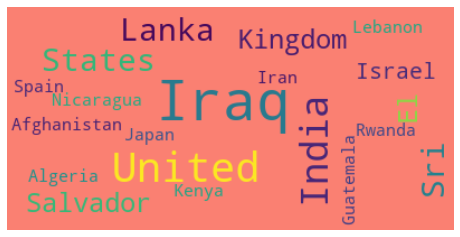

In [69]:


text_countries  = ','.join(countries)

wordcloud = wc.WordCloud(max_font_size=50, max_words=100, background_color="salmon",stopwords=[','],collocations=False).generate(text_countries)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

* The first word cloud represents countries having 0 victims of terrorism over the world for several years despite some attacks.

In [70]:
def yearZeroCountriesALL(listeYears,listeCountries,multindex_df,column_name):
  '''
  Get list of countries with zero victims of terrorism in all years
  arg1: list of years
  arg2: list of countries
  arg3: Multi index Dataframe
  return a list of countries with zero victims of terrorism from 1970 to 2017
  '''
  listeTotalVictims = dict.fromkeys(listeCountries , 0)
  listeCountriesCount = dict.fromkeys(listeCountries , len(listeYears))
  
  for year in listeYears:
    for country in listeCountries:
      if multindex_df.index.isin([(year,country)]).any() == True:
        listeTotalVictims[country] += multindex_df.xs((year,country))[column_name]
          #listeCountriesZero[country] += 1.0
      else:
        listeCountriesCount[country] -= 1.0
  for key in listeTotalVictims.keys():
    listeTotalVictims[key]= listeTotalVictims[key]/listeCountriesCount[key]
  return sorted(listeTotalVictims.items(),key=lambda item: item[1])

In [71]:
# Let's try to get the victims by country
listeCountries = list(gterror_df.country_txt.unique())
listeCountriesZero =  yearZeroCountriesALL(listeYears,listeCountries,victims_by_year_country,'victims_sum')



In [72]:
# function to return keys for any value
def get_keys(my_dict,val,param = "equal"):
    keylist = []
    for key, value in my_dict.items():
      if param =="equal":
         if val == value:
             keylist.append(key)
      else:
        if value >= val:
             keylist.append(key)
 
    return keylist

* Countries having no victims of terrorism attack from 1970 to 2017 are displayed in this wordCloud

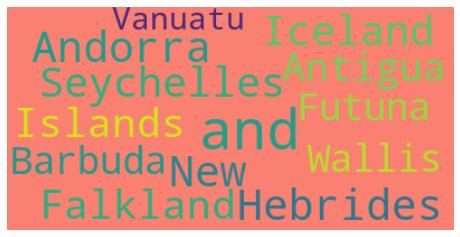

In [73]:



text_countries  = get_keys(dict(listeCountriesZero),0.0)
text_countries =','.join(text_countries)
wordcloud = wc.WordCloud(max_font_size=50, max_words=100, background_color="salmon",stopwords=[','],collocations=False).generate(text_countries)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

* Countries having number of victims more than X time the number of attacks victims  can be displayed in this wordCloud


> Example 1: countries having number of victims 1000 time higher than number of attacks


> Example 2: countries having number of victims 500 time higher than number of attacks





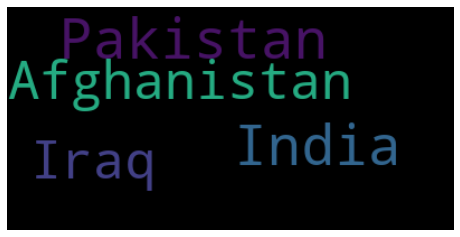

In [74]:

text_countries  = get_keys(dict(listeCountriesZero),1000.0,"greater")
text_countries =','.join(text_countries)
wordcloud = wc.WordCloud(max_font_size=50, max_words=100, background_color="black",stopwords=[','],collocations=False).generate(text_countries)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

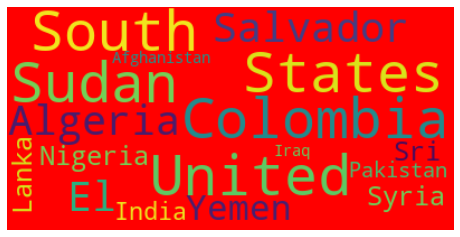

In [75]:
# Countries having number of victims more than 500 the number of attacks victims  are displayed in this wordCloud


text_countries  = get_keys(dict(listeCountriesZero),500.0,"greater")
text_countries =','.join(text_countries)
wordcloud = wc.WordCloud(max_font_size=50, max_words=100, background_color="red",stopwords=[','],collocations=False).generate(text_countries)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

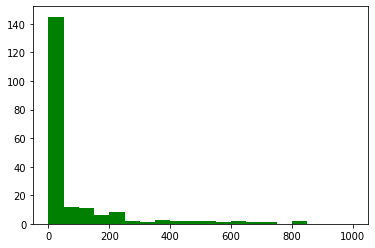

In [76]:
#Distribution of victims per attack. We delete some outliers
plt.hist( dict(listeCountriesZero).values(), bins = 20,range=(0,1000),color='g')
plt.show()

Discover for each country the toughest period where terrorist attacks were frequent.

In [77]:
import numpy as np
def discovery(country,df,column_name):
  years = list(df.xs(country,level='country_txt')[column_name].sort_values(ascending=False).index[0:6])
  return set([x for x in years for y in years if np.abs(x-y)<5])

In [78]:
data_india = discovery('India',victims_by_year_country,'victims_sum')

In [79]:
data_india

{1988, 1991, 1992, 1997, 2006, 2008}

In [80]:
data_iraq = discovery('Iraq',victims_by_year_country,'victims_sum')

In [81]:
data_iraq

{2006, 2007, 2013, 2014, 2015, 2016}

## Evolution of type of attacks in time and space

We want to study if there's a  link between the evolution of number of victims and the type of attacks and type of weapon used

In [82]:
gterror_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country_txt',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1_txt', 'target1',
       'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1_txt',
       'weapsubtype1_txt', 'nkill', 'nwound', 'property', 'ishostkid',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'victims'],
      dtype='object')

In [83]:
victims_attack = gterror_df.groupby(['iyear','country_txt','attacktype1_txt','weaptype1_txt','targtype1_txt']).agg({'nkill':'sum','nwound':'sum'})

In [84]:

victims_attack

nkill  nwound
iyear country_txt attacktype1_txt                     weaptype1_txt targtype1_txt                             
1970  Argentina   Armed Assault                       Firearms      Business                       0.0     0.0
                                                                    Military                       0.0     0.0
                                                                    Police                         0.0     2.0
                                                                    Private Citizens & Property    0.0     0.0
                  Assassination                       Firearms      Government (General)           1.0     0.0
...                                                                                                ...     ...
2017  Zambia      Facility/Infrastructure Attack      Incendiary    Journalists & Media            0.0     0.0
                                                                    Private Citizens & Property    0.0     0.0
      Zimbabwe    Facility/Infrastructure Attack      Incendiary    Business                       0.0     0.0
                                                                    Violent Political Party        0.0     0.0
                  Hostage Taking (Barricade Incident) Firearms      Government (General)           0.0     1.0

[40183 rows x 2 columns]

In [85]:
victims_attack['victims'] = victims_attack['nkill'] + victims_attack['nwound'] 

In [86]:
victims_attack

nkill  ...  victims
iyear country_txt attacktype1_txt                     weaptype1_txt targtype1_txt                       ...         
1970  Argentina   Armed Assault                       Firearms      Business                       0.0  ...      0.0
                                                                    Military                       0.0  ...      0.0
                                                                    Police                         0.0  ...      2.0
                                                                    Private Citizens & Property    0.0  ...      0.0
                  Assassination                       Firearms      Government (General)           1.0  ...      1.0
...                                                                                                ...  ...      ...
2017  Zambia      Facility/Infrastructure Attack      Incendiary    Journalists & Media            0.0  ...      0.0
                                                                    Private Citizens & Property    0.0  ...      0.0
      Zimbabwe    Facility/Infrastructure Attack      Incendiary    Business                       0.0  ...      0.0
                                                                    Violent Political Party        0.0  ...      0.0
                  Hostage Taking (Barricade Incident) Firearms      Government (General)           0.0  ...      1.0

[40183 rows x 3 columns]

In [87]:
victims_attack = victims_attack.reset_index()

#### Let's take a look at the distribution of the mode of weapons, type of attacks and target type used  during attack terrorist globally

In [88]:
px.histogram(victims_attack['weaptype1_txt'])

In [89]:
px.histogram(victims_attack['attacktype1_txt'])

In [90]:
px.histogram(victims_attack['targtype1_txt'])

In [91]:
pd.value_counts(victims_attack['targtype1_txt'])

Private Citizens & Property       6817
Government (General)              5485
Business                          4631
Police                            4092
Military                          3755
Government (Diplomatic)           2018
Transportation                    1948
Religious Figures/Institutions    1812
Journalists & Media               1723
Educational Institution           1524
Utilities                          959
Airports & Aircraft                945
Terrorists/Non-State Militia       930
Violent Political Party            755
Unknown                            698
NGO                                654
Telecommunication                  447
Tourists                           335
Maritime                           258
Food or Water Supply               230
Other                               89
Abortion Related                    78
Name: targtype1_txt, dtype: int64

#### We have studied globally the distribution of victims depending on the target type, the type of attacks and the weapon type. 
Now let's do the same thing at a country level and try to how things differ between countries

In [198]:
victims_attack = gterror_df.groupby(['iyear','country_txt','attacktype1_txt','weaptype1_txt','targtype1_txt']).agg({'nkill':'sum','nwound':'sum'})

In [199]:
victims_attack['victims'] = victims_attack['nkill'] + victims_attack['nwound']

In [200]:
victims_attack.head()

nkill  ...  victims
iyear country_txt attacktype1_txt weaptype1_txt targtype1_txt                       ...         
1970  Argentina   Armed Assault   Firearms      Business                       0.0  ...      0.0
                                                Military                       0.0  ...      0.0
                                                Police                         0.0  ...      2.0
                                                Private Citizens & Property    0.0  ...      0.0
                  Assassination   Firearms      Government (General)           1.0  ...      1.0

[5 rows x 3 columns]

In [118]:
victims_argentina = victims_attack.xs('Argentina',level = 'country_txt')

In [119]:
victims_argentina 

nkill  ...  victims
iyear attacktype1_txt                weaptype1_txt targtype1_txt                       ...         
1970  Armed Assault                  Firearms      Business                       0.0  ...      0.0
                                                   Military                       0.0  ...      0.0
                                                   Police                         0.0  ...      2.0
                                                   Private Citizens & Property    0.0  ...      0.0
      Assassination                  Firearms      Government (General)           1.0  ...      1.0
...                                                                               ...  ...      ...
2016  Armed Assault                  Firearms      Private Citizens & Property    0.0  ...      2.0
      Hostage Taking (Kidnapping)    Unknown       Business                       0.0  ...      0.0
2017  Facility/Infrastructure Attack Incendiary    Business                       0.0  ...      0.0
                                                   Private Citizens & Property    0.0  ...      0.0
                                                   Transportation                 0.0  ...      0.0

[384 rows x 3 columns]

In [121]:
victims_argentina = victims_argentina.reset_index()

In [122]:
px.histogram(victims_argentina ['targtype1_txt'])

In [123]:
px.histogram(victims_argentina ['weaptype1_txt'])

In [124]:
px.histogram(victims_argentina ['attacktype1_txt'])

In [220]:
#Number of persons killed or wounded by country and year
def get_victims_distribution_country(listeCountries,multi_index_df):
  
    
  '''
  Help identifying the distribution of victims per country depending on what kind of weapon was mostly used for terrorist attack
  or what was the target or what type of attack
  arg1: dataframe containing data
  arg2: the variable we need to know
  arg3: the country of study
  arg4: the year
  plot a histogram
  ''' 
  victims_df = {}
  #print(multi_index_df)
  for country in listeCountries:
    df = multi_index_df.xs(country,level = 'country_txt').reset_index()
    #print(df)
    victims_df[country] = df

    #victims_df.append(multi_index_df.xs(country,level = 'country_txt')[wantedcolumn])
    #victims_df = pd.concat([victims_df, multi_index_df.xs(country,level = 'country_txt')[wantedcolumn].values()])
  
  #victims_df = victims_df.reset_index()
  return victims_df

  
  

In [223]:
liste = ['Argentina','France','Iraq']
victims_df = get_victims_distribution_country(liste,victims_attack)
for data in victims_df.items():
    #print(data)
    fig = px.histogram(data[1]['attacktype1_txt'],title=f"Attack type distribution in {data[0]}")
    #fig = px.box(data, x='attacktype1_txt', y="victims")
    fig.show()


In [224]:
liste = ['Argentina','France','Iraq']
victims_df = get_victims_distribution_country(liste,victims_attack)
for data in victims_df.items():
    #print(data)
    fig = px.histogram(data[1]['weaptype1_txt'],title=f"Weapon type distribution in {data[0]}")
    #fig = px.box(data, x='attacktype1_txt', y="victims")
    fig.show()


In [225]:
liste = ['Argentina','France','Iraq']
victims_df = get_victims_distribution_country(liste,victims_attack)
for data in victims_df.items():
    #print(data)
    fig = px.histogram(data[1]['targtype1_txt'],title=f"Target type distribution in {data[0]}")
    #fig = px.box(data, x='attacktype1_txt', y="victims")
    fig.show()

In [96]:
victims_variation(victims_attack,"victims",'targtype1_txt')

#### Let's take a look at the distribution of the mode of weapons used  during attack terrorist for a country

In [102]:
sns.scatterplot(victims_attack,x='iyear',y='victims',hue='weaptype1_txt')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



ValueError: ignored

In [ ]:
victims_by_year_country_sort.columns

Index(['iyear', 'country_txt', 'victims_sum', 'victims_max'], dtype='object')

In [ ]:
victims_by_year_country_sort.reset_index(inplace=True)

In [ ]:
victims_by_year_country_sort.sort_index(level='iyear')

iyear         country_txt  victims_sum  victims_max
0      2014                Iraq      26209.0        670.0
1      2016                Iraq      25209.0       1503.0
2      2013                Iraq      22646.0        126.0
3      2015                Iraq      20308.0        251.0
4      2001       United States      19523.0       9574.0
...     ...                 ...          ...          ...
3757   2009  Bosnia-Herzegovina          0.0          0.0
3758   2009            Cameroon          0.0          0.0
3759   2009              Canada          0.0          0.0
3760   1999                Fiji          0.0          0.0
3761   1982               Japan          0.0          0.0

[3762 rows x 4 columns]

In [ ]:
victims_by_year_country_sort['iyear'][0]

2014

In [ ]:
# Let's plot by region

#### Let's look at the window they use

In [ ]:
gterror_df.weapsubtype1_txt

0                                               NaN
1                                               NaN
2                                               NaN
3                            Unknown Explosive Type
4                                               NaN
                            ...                    
181686                             Unknown Gun Type
181687    Projectile (rockets, mortars, RPGs, etc.)
181688                                   Arson/Fire
181689                                      Grenade
181690                       Unknown Explosive Type
Name: weapsubtype1_txt, Length: 181691, dtype: object

## Ask and answer questions

1. What are the global trend of terrorism from 1970 to 2017 ?

2.What are the most bloody years for terrorism in the world?

2. What are the less bloody years for terrorism in the world?

3. Victims of terrorism evolve over time particularly from 2000. What is the cause: 
* Did they use more sophisticated arms?
* Did they plan massive attacks ?
4. Countries without victims of terrorism attacks. 
5. Countries with high level of terrorism
7. Attack distributions by country
8. Attack distribution by year and country
6. To which region belongs countries with high level of terrorist attacks
7. How the type of attacks evolve by year and country

## Summarize and conclusion